In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
scenario_table = load_scenario_table(datadir / "validation_scenarios.csv")

In [4]:
# Separate the scenarios by validation category (infestation, sampling, and outcomes)
infest_validation_scenarios = scenario_table[0:16]
sample_validation_scenarios = scenario_table[16:32]
outcome_validation_scenarios = scenario_table[32:34]

## Infestation validation

### Test 1: Simulate 10 shipments with 10 boxes each (200 stems/box).
Check:
* Infestation unit - box or stem
* Fixed infestation rates - fixed values of 0.01, 0.1, 0.2
* Pest arrangement - random or clustered (box infestation unit: 2 boxes max infested units, stem infestation unit: 200 stems max infested units and 400 stems max width)

### Test 2: Simulate 10000 shipments with 100 boxes each (200 stems/box).
Check:
* Stochastic infestation rates - beta probability distribution using parameters [0.0194628, 2.7609372] (mean = 0.007, sd = 0.05)

In [6]:
num_shipments_1 = 10
infest_validation_results_1, infest_validation_details_1 = run_scenarios(
    config=basic_config,
    scenario_table=infest_validation_scenarios[0:12],
    seed=42,
    num_simulations=1,
    num_shipments=num_shipments_1,
    detailed=True,
)

Running scenario: infest_validation_1
Running scenario: infest_validation_2
Running scenario: infest_validation_3
Running scenario: infest_validation_4
Running scenario: infest_validation_5
Running scenario: infest_validation_6
Running scenario: infest_validation_7
Running scenario: infest_validation_8
Running scenario: infest_validation_9
Running scenario: infest_validation_10
Running scenario: infest_validation_11
Running scenario: infest_validation_12


In [7]:
num_shipments_2 = 10000
infest_validation_results_2, infest_validation_details_2 = run_scenarios(
    config=basic_config,
    scenario_table=infest_validation_scenarios[12:16],
    seed=42,
    num_simulations=1,
    num_shipments=num_shipments_2,
    detailed=True,
)

Running scenario: infest_validation_13
Running scenario: infest_validation_14
Running scenario: infest_validation_15
Running scenario: infest_validation_16


In [8]:
# Save dataframe from test 1
infest_validation_df_1 = save_scenario_result_to_pandas(
    infest_validation_results_1,
    config_columns=[
        "shipment_name",
        "shipment/boxes/min",
        "shipment/boxes/max",
        "shipment/stems_per_box/default",
        "pest/infestation_unit",
        "pest/infestation_rate/distribution",
        "pest/infestation_rate/value",
        "pest/arrangement",
        "pest/clustered/distribution",
        "pest/clustered/max_infested_units_per_cluster",
        "pest/clustered/random/max_cluster_stem_width",
    ],
    result_columns=[
        "true_infestation_rate",
        "total_missed_pests",
    ],
)

In [9]:
# Save dataframe from test 2
infest_validation_df_2 = save_scenario_result_to_pandas(
    infest_validation_results_2,
    config_columns=[
        "shipment_name",
        "shipment/boxes/min",
        "shipment/boxes/max",
        "shipment/stems_per_box/default",
        "pest/infestation_unit",
        "pest/infestation_rate/distribution",
        "pest/infestation_rate/value",
        "pest/arrangement",
        "pest/clustered/distribution",
        "pest/clustered/max_infested_units_per_cluster",
        "pest/clustered/random/max_cluster_stem_width",
    ],
    result_columns=[
        "true_infestation_rate",
        "total_missed_pests",
    ],
)

In [10]:
# Combine dataframes from both tests to view infestation rates
infest_validation_df = infest_validation_df_1.append(infest_validation_df_2)
infest_validation_df

,shipment_name,shipment/boxes/min,shipment/boxes/max,shipment/stems_per_box/default,pest/infestation_unit,pest/infestation_rate/distribution,pest/infestation_rate/value,pest/arrangement,pest/clustered/distribution,pest/clustered/max_infested_units_per_cluster,pest/clustered/random/max_cluster_stem_width,true_infestation_rate,total_missed_pests
0,clustered_stem_0.01,10,10,200,stem,fixed_value,0.01,clustered,random,200,400,0.010000,200.0
1,random_stem_0.01,10,10,200,stem,fixed_value,0.01,random,,,400,0.010000,200.0
2,clustered_box_0.01,10,10,200,box,fixed_value,0.01,clustered,random,2,400,0.000000,0.0
3,random_box_0.01,10,10,200,box,fixed_value,0.01,random,,,400,0.000000,0.0
4,clustered_stem_0.1,10,10,200,stem,fixed_value,0.1,clustered,random,200,400,0.100000,2000.0
5,random_stem_0.1,10,10,200,stem,fixed_value,0.1,random,,,400,0.100000,2000.0
6,clustered_box_0.1,10,10,200,box,fixed_value,0.1,clustered,random,2,400,0.100000,2000.0
7,random_box_0.1,10,10,200,box,fixed_value,0.1,random,,,400,0.100000,2000.0
8,clustered_stem_0.2,10,10,200,stem,fixed_value,0.2,clustered,random,200,400,0.200000,4000.0
9,random_stem_0.2,10,10,200,stem,fixed_value,0.2,random,,,400,0.200000,4000.0


In [17]:
# Look at stems from only test 1 (smaller shipments for easier visualization)
infest_validation_stems_unstacked = [i[0] for i in infest_validation_details_1]

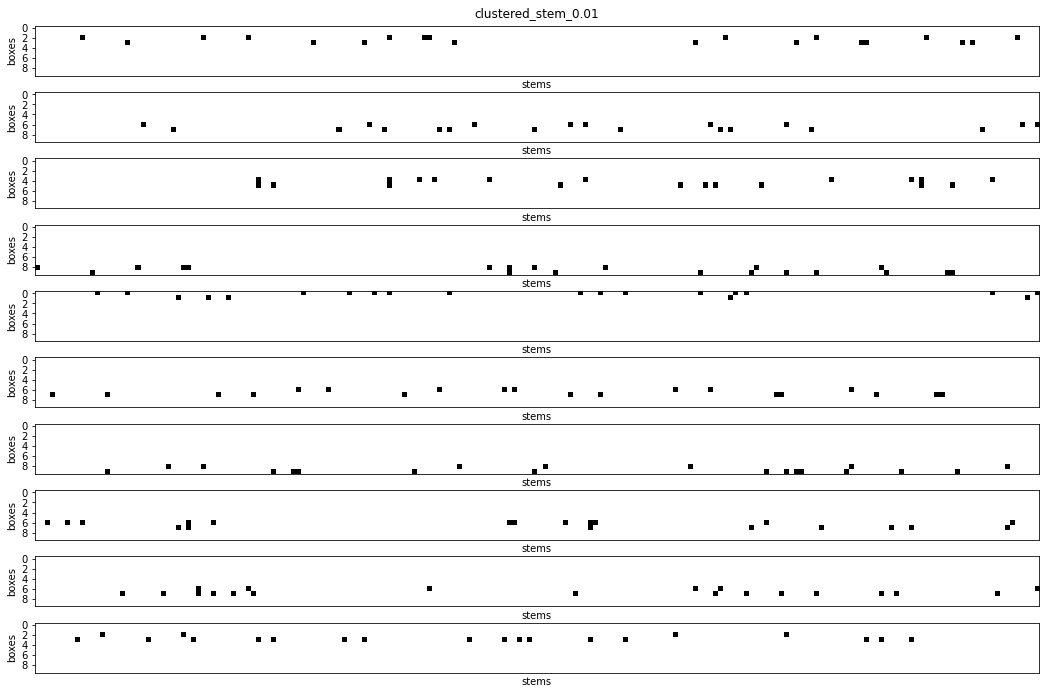

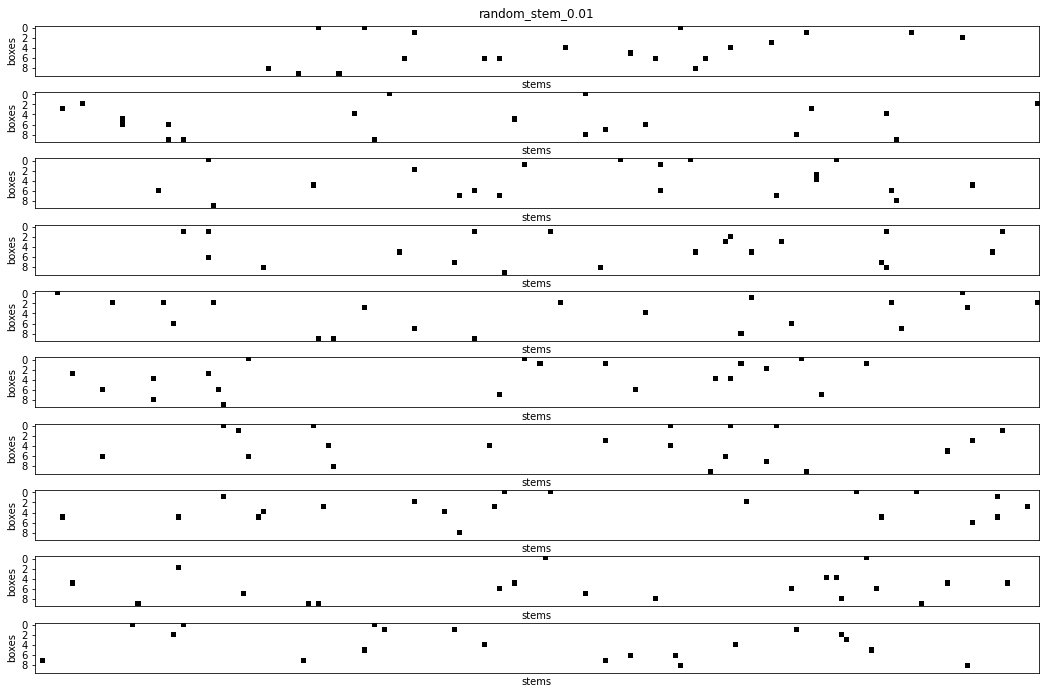

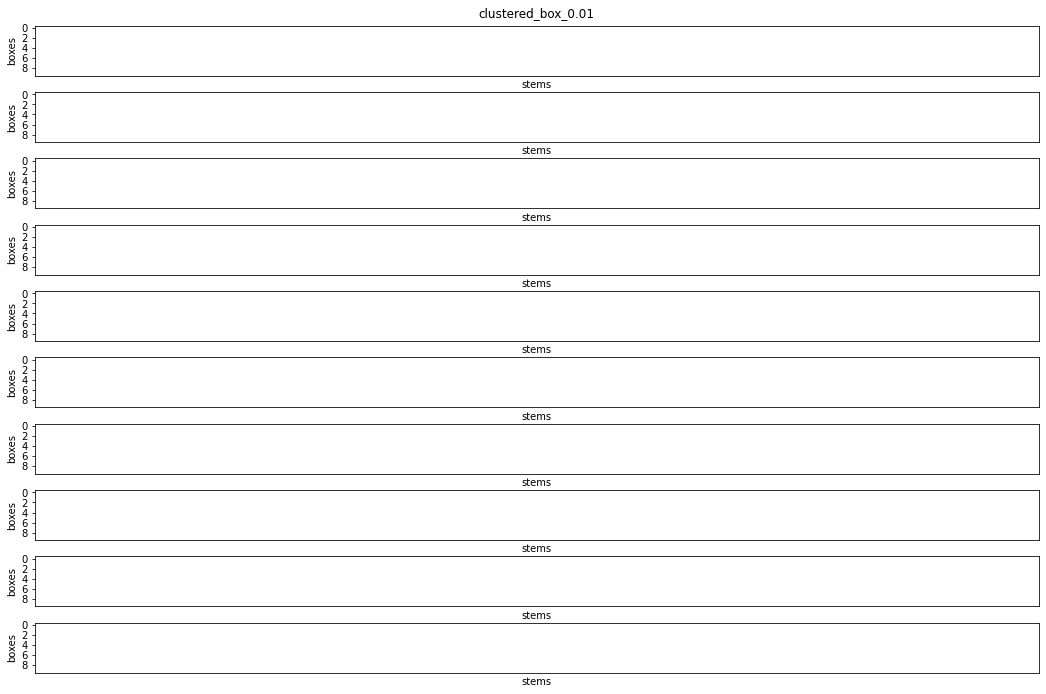

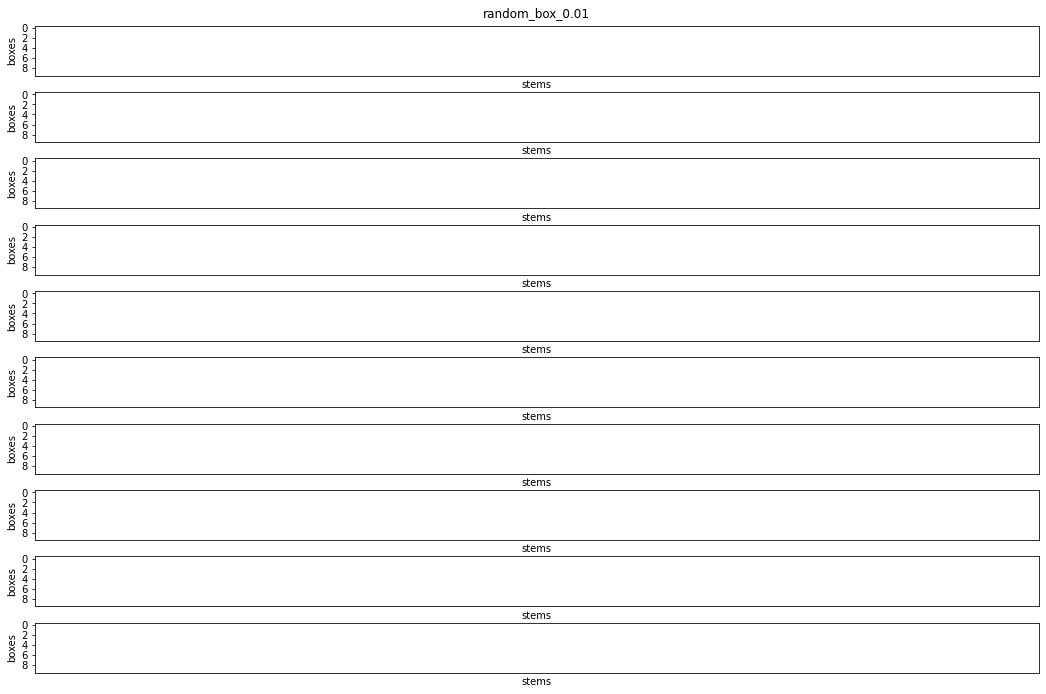

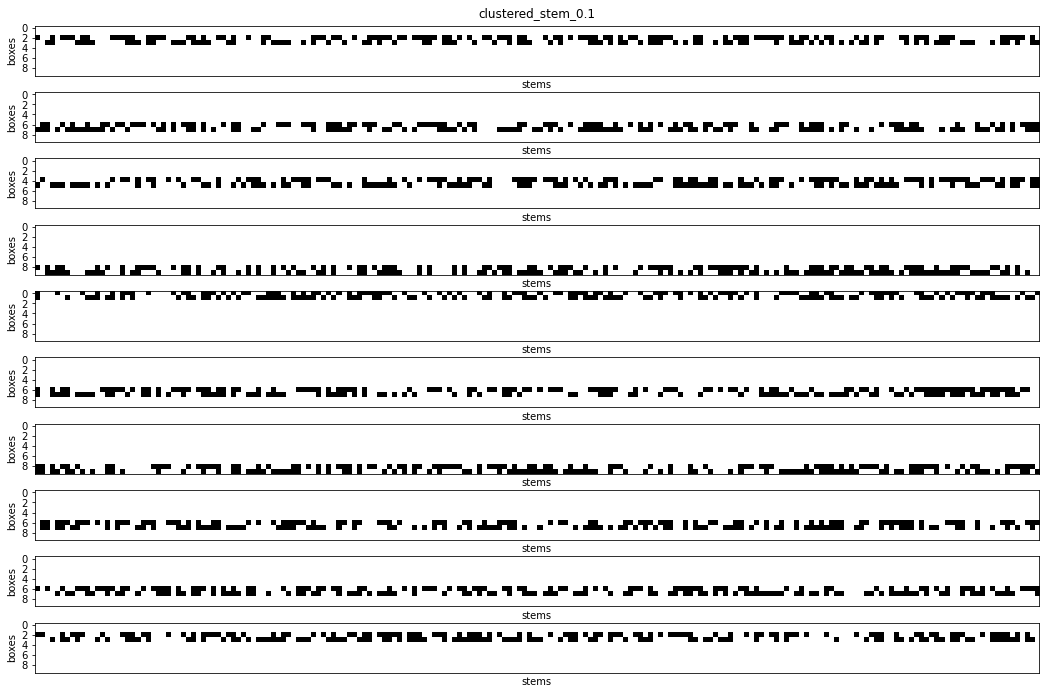

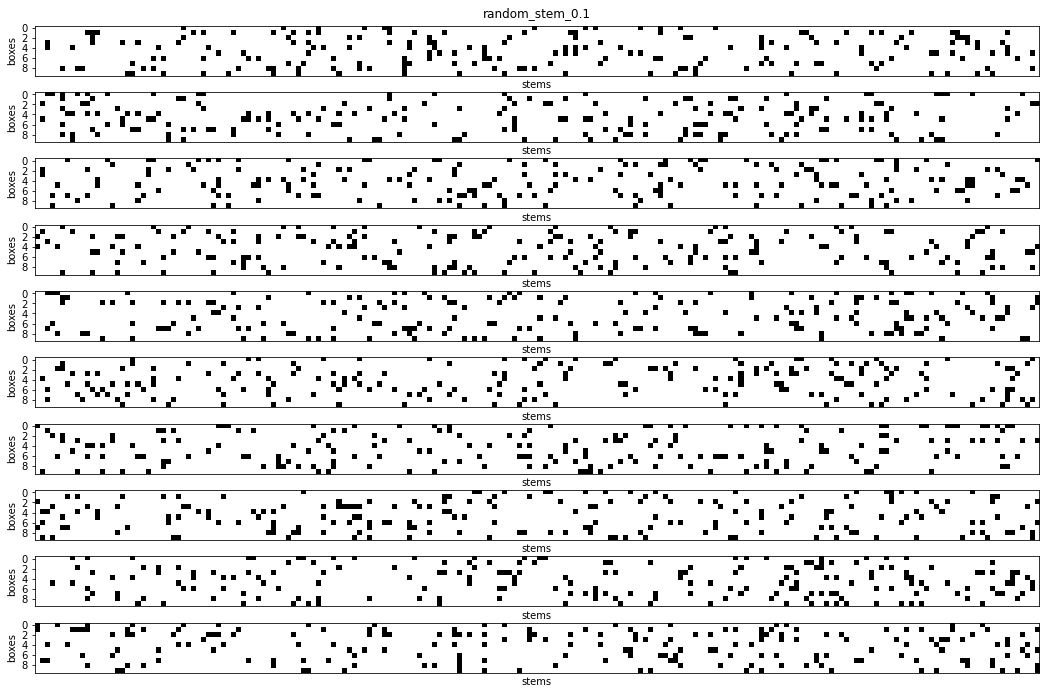

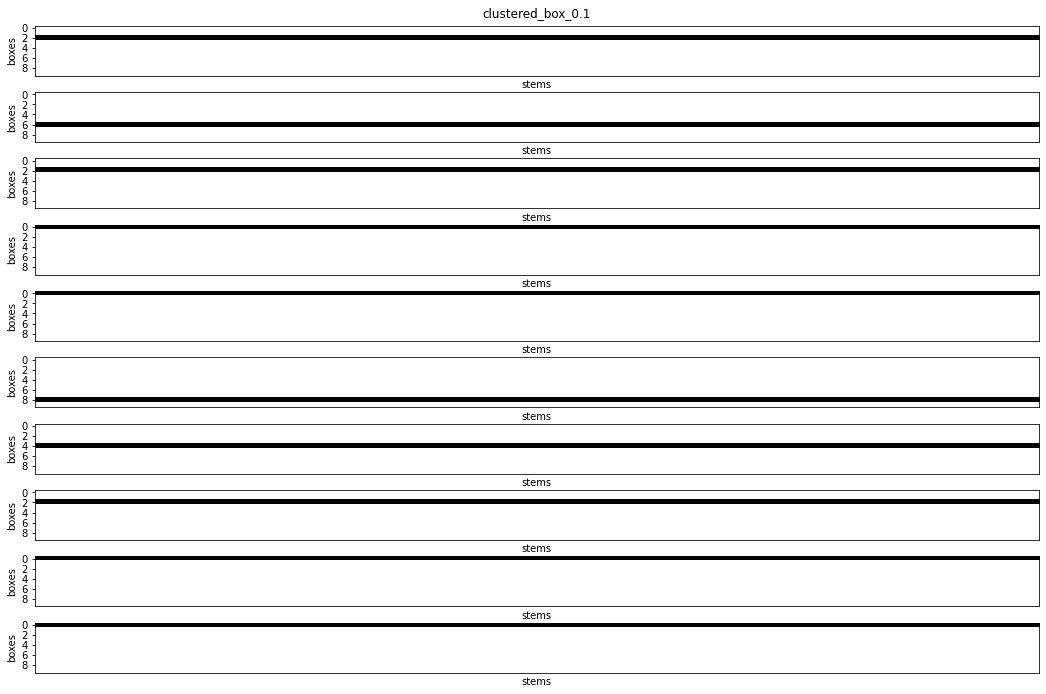

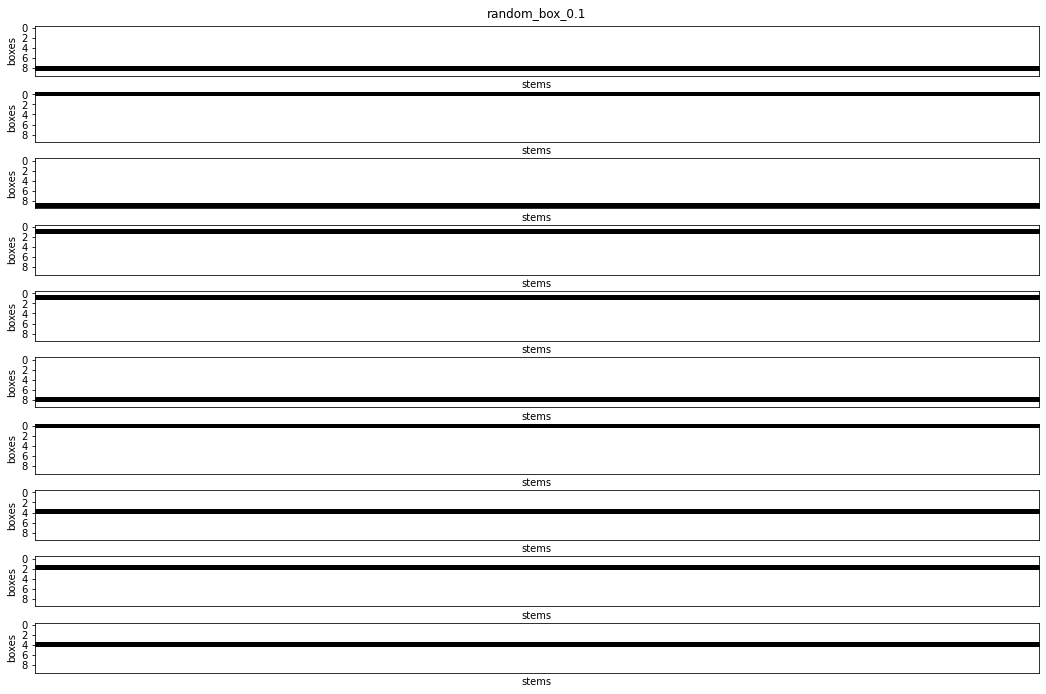

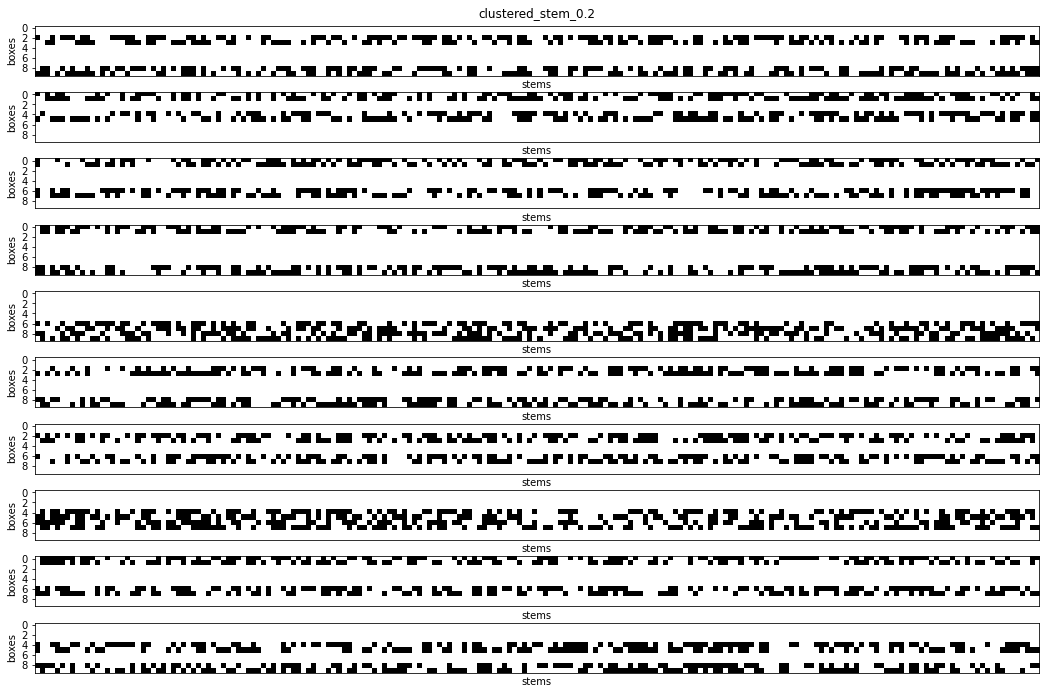

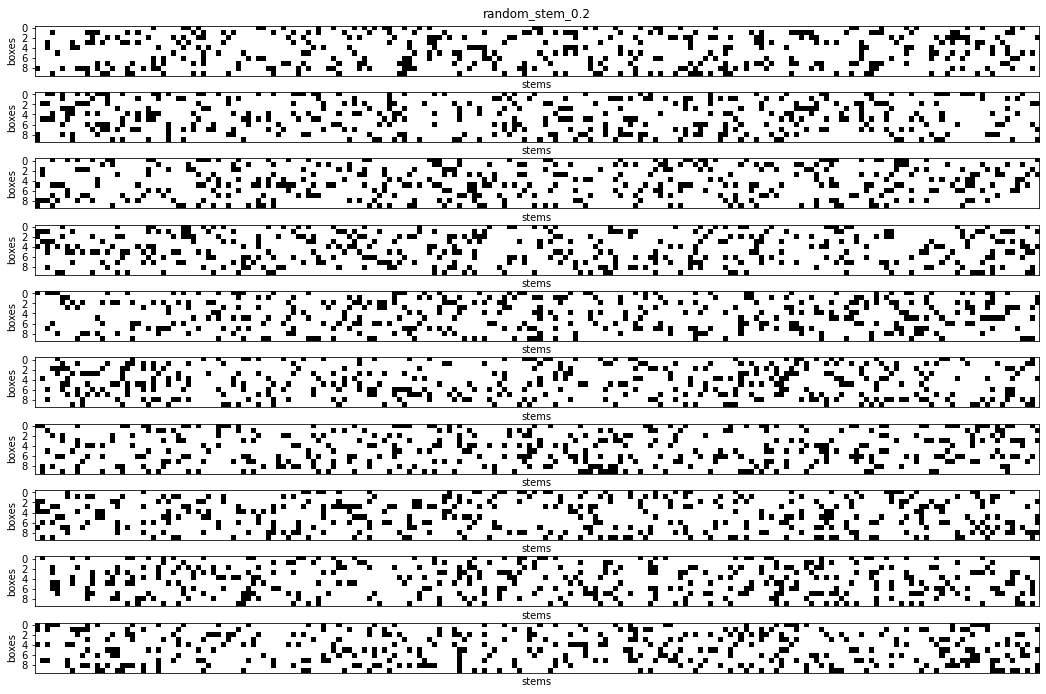

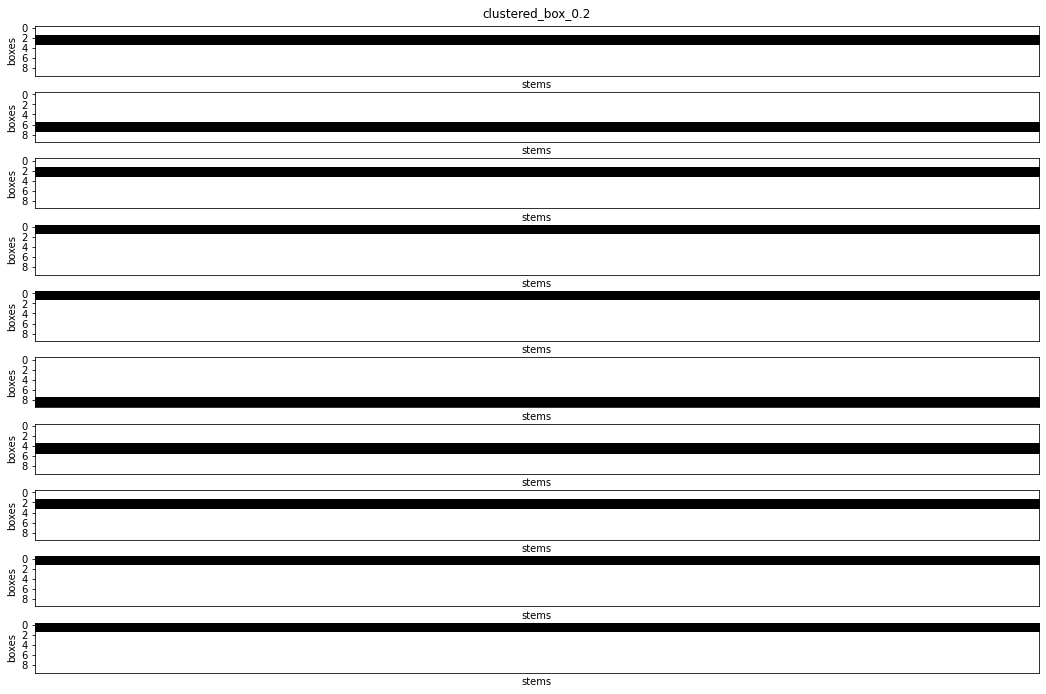

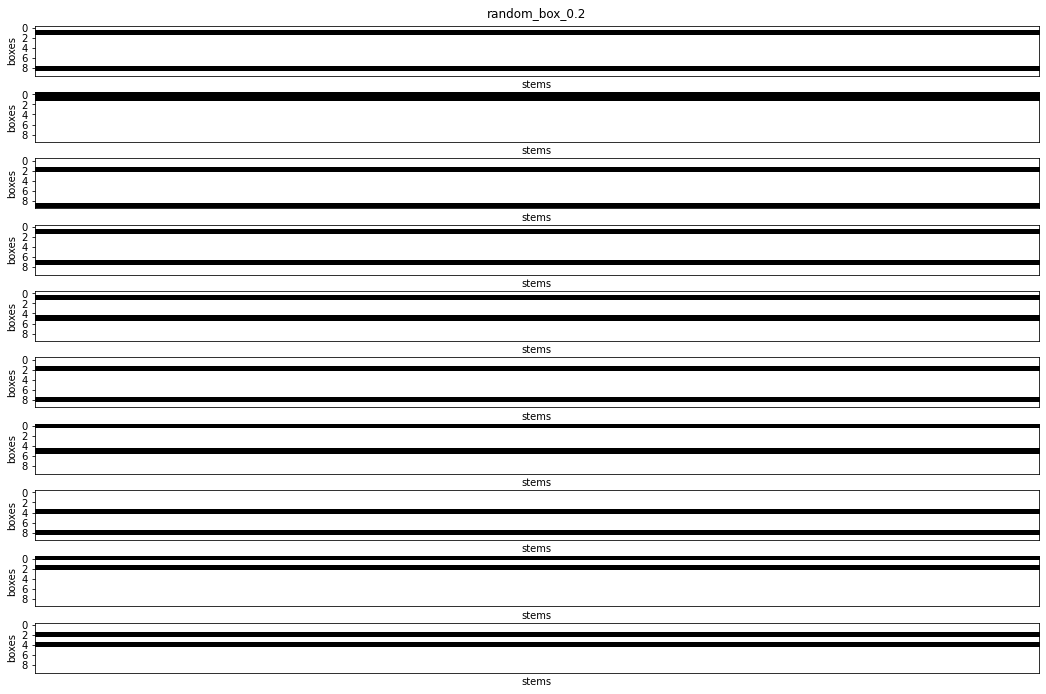

In [25]:
# Plot stems for each scenario and check pest arrangement and infestation unit

scenarios = infest_validation_df_1["shipment_name"]

for index, scenario in enumerate(scenarios):
    infest_validation_stems = np.stack(infest_validation_stems_unstacked[index])
    stems_by_shipment = np.vsplit(infest_validation_stems, num_shipments_1)
    fig, axs = plt.subplots(len(stems_by_shipment), figsize=(18,12))
    for i in range(len(stems_by_shipment)):
        axs[i].matshow(stems_by_shipment[i], cmap='Greys')
        axs[i].set_ylabel('boxes')
        axs[i].set_xlabel('stems')
        axs[i].tick_params(labeltop=False, top=False, bottom=False)
        if i == 0:
            axs[i].set_title(scenario)

In [ ]:
num_shipments = 1
sample_validation_results, sample_validation_details = run_scenarios(
    config=basic_config,
    scenario_table=sample_validation_scenarios,
    seed=42,
    num_simulations=1,
    num_shipments=num_shipments,
    detailed=True,
)

In [ ]:
sample_validation_df = save_scenario_result_to_pandas(
    sample_validation_results,
    config_columns=[
        "name",
        "shipment_name",
        "inspection_name",
        "shipment/boxes/min",
        "shipment/boxes/max",
        "shipment/stems_per_box/default",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
    ],
    result_columns=[
        "avg_boxes_opened_completion",
        "avg_stems_inspected_completion",
    ],
)
sample_validation_df

In [ ]:
sample_validation_stems = [i[0] for i in sample_validation_details]
sample_validation_inspected_indexes = [i[1] for i in sample_validation_details]

In [ ]:
sample_validation_inspected_indexes[0][0]

In [ ]:
sample_validation_inspected_indexes[1][0]

In [ ]:
sample_validation_inspected_indexes[2][0]

In [ ]:
sample_validation_inspected_indexes[3][0]

In [ ]:
num_shipments = 10000
outcome_validation_results, outcome_validation_details = run_scenarios(
    config=basic_config,
    scenario_table=outcome_validation_scenarios,
    seed=42,
    num_simulations=1,
    num_shipments=num_shipments,
    detailed=True,
)

In [ ]:
outcome_validation_df = save_scenario_result_to_pandas(
    outcome_validation_results,
    config_columns=[
        "name",
        "shipment/boxes/min",
        "shipment/boxes/max",
        "shipment/stems_per_box/default",
        "pest/infestation_unit",
        "pest/infestation_rate/distribution",
        "pest/infestation_rate/value",
        "pest/arrangement",
        "inspection/unit",
        "inspection/sample_strategy",
    ],
    result_columns=[
        "true_infestation_rate",
        "false_neg",
        "intercepted",
        "total_missed_pests",
        "total_intercepted_pests",
        "avg_boxes_opened_completion",
        "avg_stems_inspected_completion",
    ],
)
outcome_validation_df

In [ ]:
df['shipment_name'] = pd.Categorical(df['shipment_name'])
shipment_order = ["infestation_5", "infestation_10", "infestation_25", "small", "large", "maritime", "clustered", "clustered_small", "clustered_large"]
df['shipment_name'] = df['shipment_name'].cat.reorder_categories(shipment_order, ordered=True)
df

In [ ]:
df.plot(kind="bar", x="inspection_name", y="missing")

In [ ]:
#df["shipment"] = df.apply(lambda row: re.sub("_[0-9]+$", "", row["name"]), axis = 1)

In [ ]:
df.groupby("shipment_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="shipment_name", y="missing")

In [ ]:
df.groupby("inspection_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="inspection_name", y="missing")
plt.xlabel("inspection", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg percent infested shipments missed by inspection", size=16)

In [ ]:
inspections_vs_shipments = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["missing"])
inspections_vs_shipments

In [ ]:
inspections_vs_shipments.plot(kind="bar")

In [ ]:
ax = inspections_vs_shipments.plot(kind="bar", figsize=(100, 10))
#ax.figure.savefig("inspections_vs_shipments_bar.png")

In [ ]:
from itertools import cycle, islice

it = cycle(list(range(1,49)))
df['inspection_num'] = list(islice(it, len(df)))

In [ ]:
plt.figure(figsize=(30, 8))
sns.boxplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent infested shipments missed by inspection", size=20)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(30, 8))
sns.barplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent infested shipments missed by inspection", size=20)
plt.savefig("missed_by_inspection.png", bbox_inches = "tight")

In [ ]:
sns.barplot(x="shipment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg. percent infested shipments missed by shipment type", size=16)
plt.savefig("missed_by_shipment.png", bbox_inches = "tight")

In [ ]:
sns.boxplot(x="shipment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type", size=16)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

In [ ]:
sns.catplot(x="shipment_name", y="missing", hue="inspection/sample_strategy", kind="box", data=df, height=8.27, aspect=11.7/8.27)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type and sample strategy", size=16)
plt.savefig("missed_by_shipment_sample_strategy.png", bbox_inches = "tight")

In [ ]:
sns.catplot(x="shipment_name", y="missing", hue="inspection/unit", kind="box", data=df, height=9, aspect=11.7/8.27)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type and inspection unit", size=16)
plt.savefig("missed_by_shipment_unit.png", bbox_inches = "tight")

In [ ]:
chart = sns.catplot(x="shipment_name", y="missing", hue="inspection/selection_strategy", aspect=11.7/8.27,
            kind="box", data=df, height=8)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type and selection strategy", size=16)
chart.savefig("missed_by_shipment_selection.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Percent infested shipments missed", size=16)
plt.savefig("heatmap_missed.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_boxes_opened = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_boxes_opened_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_boxes_opened, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to completion)", size=16)
plt.savefig("heatmap_boxes_completion.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_stems_inspected = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_stems_inspected_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_stems_inspected, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of stems inpected (inspect to completion)", size=16)
plt.savefig("heatmap_stems_completion.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_boxes_opened_detection = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_boxes_opened_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_boxes_opened_detection, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to detection)", size=16)
plt.savefig("heatmap_boxes_detection.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_stems_inspected_detection = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_stems_inspected_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_stems_inspected_detection, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of stems inspected (inspect to detection)", size=16)
plt.savefig("heatmap_stems_detection.png", bbox_inches = "tight")

In [ ]:
df_norm = df[["missing",
        "true_infestation_rate",
        "max_intercepted_infestation_rate",
        "avg_intercepted_infestation_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_stems_inspected_completion",
        "avg_stems_inspected_detection",
        "pct_sample_if_to_detection",
        "pct_pest_unreported_if_detection"]]
df_norm

In [ ]:
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm

In [ ]:
df_norm["name"], df_norm["inspection_num"], df_norm["inspection_name"], df_norm["shipment_name"] = df["name"], df["inspection_num"], df["inspection_name"], df["shipment_name"]
df_norm

In [ ]:
df_norm_melted = pd.melt(df_norm, id_vars=["inspection_num", "inspection_name", "shipment_name"], value_vars=["missing", "avg_boxes_opened_completion", "avg_stems_inspected_completion"])
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted, ax=ax1, ci = None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (mean value across all shipment types)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_all.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("infestation_5")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (5% Infestation shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_infestation_5.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("infestation_10")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (10% Infestation shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_infestation_10.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("infestation_25")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (25% Infestation shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_infestation_25.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Small shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_small.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Large shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_large.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("maritime")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Maritime shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_maritime.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("clustered")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("clustered_small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered small shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_small.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("clustered_large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered large shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_large.png", bbox_inches = "tight")